<h1> A Comprehensive Tutorial To Understand EDA + Time Series Analysis + TimeSeries Forecasting SARIMAX & Prophet <h1/>

# **Giới thiệu:**

Cuộc thi này được đặt tên là **Dự báo - M5**, những người tham gia cuộc thi dự kiến sẽ sử dụng dữ liệu bán hàng phân cấp dùng để phân tích đã được xử lý và trích xuất từ Walmart, công ty lớn nhất thế giới được tính theo doanh thu và sử dụng những dữ liệu này để dự báo doanh số bán hàng trong vòng 28 ngày sắp tới. Tập dữ liệu bán hàng chứa thông tin về khoảng 30.000 mặt hàng khác nhau trong 1900 ngày gần nhất. Việc phân bố dữ liệu đã được phân chia rãi rác xung quanh và bao gồm các cửa hàng ở ba tiểu bang ở Hoa Kỳ (California, Texas, Wisconsin) bao gồm cấp bậc của các mặt hàng, các bộ phận, các danh mục sản phẩm và chi tiếp cấp cửa hàng. Ngoài ra, nó có các biến số để giải thích như là: giá cả, chương trình khuyến mãi, các ngày trong tuần và các chương trình, sự kiện đặc biệt. Khi kết hợp sử dụng cùng nhau, bộ dữ liệu mạnh mẽ này sẽ không chỉ hữu ích trong việc cải thiện độ chính xác của dự báo mà còn có thể giúp hiển thị các mô hình bán hàng để dễ dàng quan sát thông qua các ngôn ngữ khác nhau cũng như dựa trên một loạt các danh mục sản phẩm khác nhau cung cấp thông tin chi tiết có giá trị về doanh nghiệp.


Do thực tế là tập dữ liệu lớn này đã được tạo sẵn. Chúng tôi sẽ bắt đầu với một công thức kinh doanh được đưa ra xung quanh một số vấn đề. Liệu rằng tập dữ liệu này có đủ để trả lời các câu hỏi đó hay không, điều đó sẽ được xác định bởi tập dữ liệu có sẵn. Nếu bộ dữ liệu không tìm thấy câu trả lời, thì thông tin cần thiết ít nhất liên quan đến việc thu thập một vài điểm dữ liệu chắc chắn sẽ giúp cải thiện việc thiết kết dữ liệu trong tương lai.

# **Vấn đề đặt ra:**

Một tập ngày lớn khiến cho việc tìm kiếm tất cả các mẫu cơ bản có trong tập dữ liệu trở nên khó khăn. May mắn thay, việc đặt ra một số câu hỏi theo tính chất SMART (SMART là viết tắt của specific, measureable, attainable, relevant và time-bound) rất hữu ích trong việc hiểu các mô hình khác nhau, có thể đã vô hình với phương pháp tiếp cận toàn diện vào tập dữ liệu.

Trong khảo sát cụ thể của dự báo M5, chúng tôi sẽ quan tâm đến việc tìm ra:

* Sự phân phối chung của các **sales_item (id)** trên các danh mục là gì?
* Hành vi của các danh mục trên các cửa hàng khác nhau là gì?
* **Id** mặt hàng cụ thể nào bán chạy nhất?
* **Id** cụ thể của mặt hàng trong mỗi danh mục có nhiều doanh thu nhất là gì?
* Doanh thu bán hàng thu được nhiều nhất là bao nhiêu? Id mặt hàng bán chạy nhất mang lại nhiều doanh thu nhất hay có sự thay đổi theo các xu hướng đó không?
* Hành vi của tổng doanh số bán hàng (hoặc doanh số bán hàng trung bình) theo thời gian là gì
* Hành vi bán **item_ids** trong các ngày khác nhau trong tuần là gì? Có bất kỳ ngày cụ thể nào trong tháng có nhiều doanh thu nhất không? Xu hướng này thay đổi như thế nào ở các cửa hàng khác nhau?

Và cuối cùng, chúng tôi sẽ sử dụng SARIMAX và Mô hình Tiên tri đã được Facebook phát triển để dự báo doanh số bán hàng trong 28 ngày tới.

# **Đánh giá số liệu:**

Dự án này sử dụng khá nhiều số liệu lỗi đã được sử dụng để tối ưu hóa và tinh chỉnh mô hình hoặc để tìm độ chính xác của dự đoán cho dự báo được thực hiện bằng cách sử dụng chuỗi thời gian. Với tình hình của dự báo chuỗi thời gian mà chúng tôi đang phải thực hiện, chúng tôi sẽ theo các thước đo lỗi đã được sử dụng.

RMSE (Root Mean Square Error) - Để đánh giá dự báo bán hàng được thực hiện bằng cách sử dụng SARIMAX, số liệu lỗi RMSE đã được sử dụng. Chuỗi thời gian được sử dụng trong trường hợp này, lấy số lượng bán hàng trung bình được thực hiện, trong suốt gần 1900 ngày, liên quan đến việc sắp xếp dữ liệu thứ cấp ban đầu của id sản phẩm cùng với một số cấp độ khác. Tính tối đa của chỉ số lỗi RMSE không bị vô hiệu vì chúng tôi đang xem xét số lần bán hàng trung bình được thực hiện, do đó vô hiệu hóa ảnh hưởng của rất nhiều số 0 đối với nhiều id sản phẩm, cùng với số ngày.

Mất tùy chỉnh (WMAPE): Số liệu lỗi Tỷ lệ phần trăm tuyệt đối có trọng số trung bình được sử dụng để đánh giá và tìm các thông số tối ưu cho Mô hình nhà tiên tri do Facebook thiết kế. Lỗi WMAPE được sử dụng cho những trường hợp mà mức độ ưu tiên của mỗi id sản phẩm được xem xét cùng với số lượng bán hàng đã thực hiện. Các hệ số có trọng số được tính toán bằng cách chia sự khác biệt giữa giá trị dự báo và giá trị bán hàng thực tế cho giá trị trung bình của chúng.

WRMSSE (Lỗi tỷ lệ gốc trung bình có trọng số): Để đánh giá hiệu quả của mô hình được thiết kế, điểm WRMSSE được tính sau khi khung dữ liệu sẵn sàng dự đoán (dự báo gần 30.000 id sản phẩm) đã sẵn sàng. Điều này là cần thiết vì điểm WRMSSE được tính toán yêu cầu phải sử dụng tổng số mục nhập của tất cả id sản phẩm (gần 30.000 sản phẩm) và sau đó là sự khác biệt giữa các giá trị của tập dữ liệu xác thực, tức là sales_train_validation.csv và khung dữ liệu được dự báo. Chỉ số lỗi WRMSSE này là chỉ số do cuộc thi cung cấp và đã được tối ưu hóa để sử dụng cho cuộc thi hiện tại. Để đánh giá nó, chúng tôi sẽ phải sử dụng toàn bộ tập dữ liệu của sales_train_validation.csv đã được cung cấp trong một tệp csv. Giải thích thêm cho lỗi này có thể được tìm thấy tại https://mofc.unic.ac.cy/m5-competition/

# **Thêm các thư viện được yêu cầu**

In [ ]:
!pip uninstall gdown -y && pip install gdown

In [ ]:
!rmdir dataset
!mkdir dataset

!gdown --folder https://drive.google.com/drive/folders/1DVCGeZnvEgdR9RQIhDaRTGHjeSGeCv7E?usp=sharing -O /content/dataset

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import time
import math
import datetime


# Import widgets
from ipywidgets import widgets, interactive, interact
import ipywidgets as widgets
from IPython.display import display

from math import log, floor
from sklearn.neighbors import KDTree

import seaborn as sns
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import pywt
from statsmodels.robust import mad

import scipy
import statsmodels
from scipy import signal

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

import itertools
from itertools import cycle
plt.style.use('seaborn')
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/content/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**Output**

/content/dataset/myfile.csv

/content/dataset/calendar.csv

/content/dataset/countries.csv

/content/dataset/sample_submission.csv

/content/dataset/sales_train_validation.csv

/content/dataset/stocks.eps

/content/dataset/sell_prices.csv

/content/dataset/sales_train_evaluation.csv

/content/dataset/Index2018.csv

## **Mô tả tập dữ liệu:**

Mô tả các tệp dữ liệu được nhập vào sổ ghi chép này như sau:

* **calendar_df.csv** - Chứa thông tin về ngày sản phẩm được bán và cũng chứa thông tin về các ngày lễ và các dịp đặc biệt.

* **train_sales_df.csv** - Chứa dữ liệu lịch sử bán hàng đơn vị hàng ngày cho mỗi sản phẩm và id cửa hàng và bộ phận với gần như dữ liệu bán hàng trong 1900 ngày **[d_1 - d_1913]**
* **submit_file.csv** - Định dạng đúng cho tệp gửi, chứa **id** sản phẩm và **id** cột cho dự báo dữ liệu bán hàng 28 ngày tới.
* **sell_prices_df.csv** - Chứa thông tin về giá của các sản phẩm được bán trên mỗi cửa hàng và ngày.
* **sales_train_evaluation.csv** - Bao gồm doanh số bán hàng **[d_1 - d_1941]** (nhãn được sử dụng cho bảng xếp hạng công khai)

# **Thêm các tập dữ liệu**

In [ ]:
# Đọc các file và gán vào các object
sell_prices_df = pd.read_csv('https://media.githubusercontent.com/media/minhhieu9800/Python-MSE/main/Data/sell_prices.csv')
train_sales_df = pd.read_csv('https://media.githubusercontent.com/media/minhhieu9800/Python-MSE/main/Data/sales_train_validation.csv')
calendar_df = pd.read_csv('https://media.githubusercontent.com/media/minhhieu9800/Python-MSE/main/Data/calendar.csv')
submission_file = pd.read_csv('https://media.githubusercontent.com/media/minhhieu9800/Python-MSE/main/Data/sample_submission.csv')

# **Hiểu về tập dữ liệu**

In [ ]:
sell_prices_df.info() # Hiển thị thông tin của object sell_prices_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


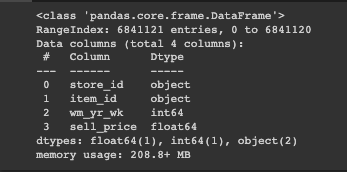

In [ ]:
train_sales_df.info() # Hiển thị thông tin của object train_sales_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


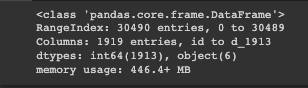

In [ ]:
calendar_df.info() # Hiển thị thông tin của object calendar_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


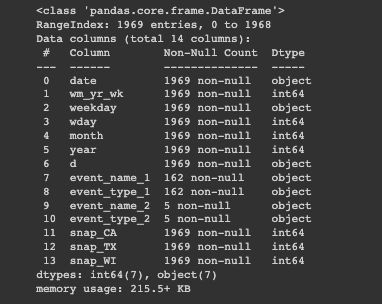

Bây giờ chúng ta đã xem xét dữ liệu được cung cấp và hiểu chung về tập dữ liệu, chúng ta có thể thấy các mối quan hệ khác nhau giữa các cửa hàng, các sản phẩm cụ thể được bán, danh mục mà người tiêu dùng quan tâm nhất cũng như việc bán các mặt hàng theo ngôn ngữ cụ thể. **Sell_prices_df** chứa thông tin dọc theo cấp độ cửa hàng của khoảng 6 triệu mục nhập trong khi **train_sales_df** có thông tin về khoảng 30.000 sản phẩm khác nhau.

Hơn nữa, tập dữ liệu trong calendar_df giúp bạn có thể thực hiện phân tích chuỗi thời gian của các sản phẩm đã bán.

# EDA (Exploratory Data Analysis):

## **Câu hỏi về Phân phối Sản phẩm & Hành vi trên Dòng thời gian**

Bắt đầu với khung dữ liệu được biểu thị bằng train_sales_df có thông tin cụ thể về mặt hàng **('id')**, địa điểm cụ thể **('store_id', 'state_id')** và ngày bán hàng cụ thể **(d_1 đến d_1913)**; Trước tiên, hãy để chúng tôi thực hiện các điều chỉnh cần thiết để tách các ngày bán hàng để chỉ có thể dễ dàng quan sát các phân tích theo **item_id**, **store_id** và **dept_id** chỉ trong các ngày bán hàng.

In [ ]:
train_sales_df.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1


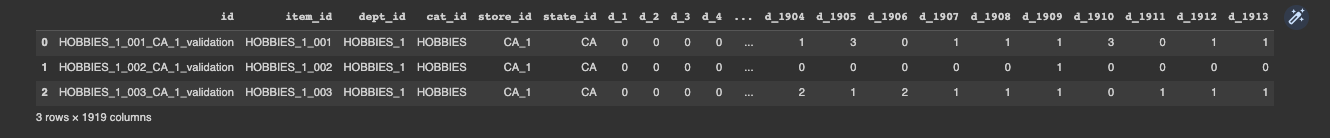

In [ ]:
d_cols = [c for c in train_sales_df.columns if 'd_' in c]
train_sales_df['total_sales_all_days'] = train_sales_df[d_cols].sum(axis = 1)
train_sales_df['avg_sales_all_days'] = train_sales_df[d_cols].mean(axis = 1)
train_sales_df['median_sales_all_days'] = train_sales_df[d_cols].median(axis = 1)
#train_sales_df.groupby(['id'])['total_sales_all_days'].sum().sort_values(ascending=False)

## **Phân phối Product_ids trên khắp các Categories?**

In [ ]:
df = train_sales_df.groupby(['cat_id'])['id'].count().reset_index(name='total_entries') # Nhóm các thuộc tính
# Thiết lập các thuộc tính của biểu đồ
fig = px.pie(df, values='total_entries', names='cat_id', 
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 750, height=450, title = 'Distribution of Product_IDs Across Categories')
fig.show() # Hiển thị biểu đồ

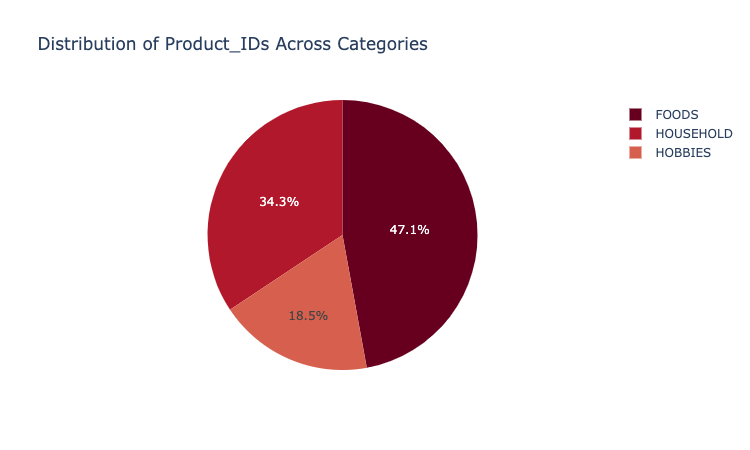

Các mặt hàng thực phẩm là mặt hàng bán chạy nhất, tiếp đến là các mặt hàng gia dụng và sau đó là các mặt hàng theo sở thích.

In [ ]:
df = train_sales_df.groupby(['state_id'])['total_sales_all_days'].sum().reset_index() # Nhóm các thuộc tính
# Thiết lập các thuộc tính cho biểu đồ
fig = px.pie(df, values='total_sales_all_days', names='state_id', 
            color_discrete_sequence=px.colors.sequential.Aggrnyl,
            width = 750, height=450, title = 'Distribution of Total_Sales Across States')
fig.show() # Hiển thị biểu đồ

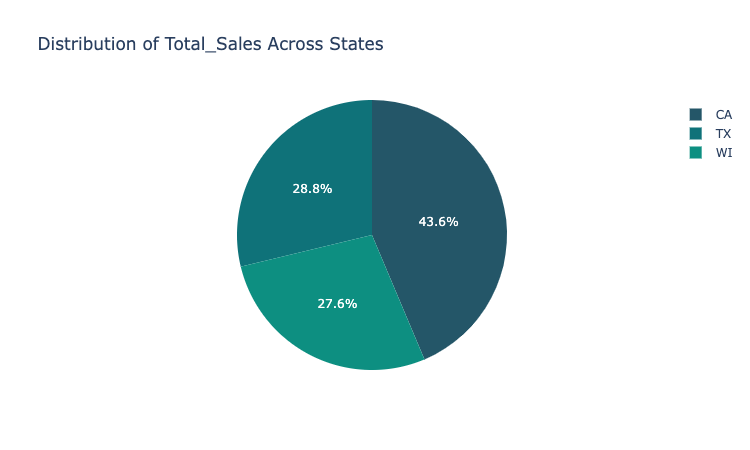

Đối với tổng số lượng hàng bán ra, một lần nữa rõ ràng là số lượng mặt hàng được bán trên tổng số mặt hàng có tỷ trọng đóng góp lớn nhất ở CA, tiếp theo là Texas và Wisconsin. Bây giờ có phải là trường hợp của tổng doanh thu được tạo ra không? Chúng tôi sẽ tìm ra điều đó bằng cách sử dụng khung dữ liệu doanh thu

In [ ]:
# Nhóm các thuộc tính của đối tượng
df1 = train_sales_df.groupby(['cat_id'])['id'].count().reset_index(name='total_entries')
df2 = train_sales_df.groupby(['cat_id', 'state_id'])['total_sales_all_days'].sum().reset_index()

In [ ]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
# Thiết lập thuộc tính ch biểu đồ bên trái
sns.barplot(x = 'cat_id', y='total_entries', data=df1, 
            palette='mako', ax=ax1)
# Thiết lập thuộc tính cho biểu đồ bên phải
sns.barplot(x = 'cat_id', y='total_sales_all_days', hue='state_id', data=df2, 
            palette='magma', ax=ax2)

plt.xticks(rotation=90) # Xoay biểu đồ mọt góc 90 độ
plt.show() # Hiển thị biểu đồ

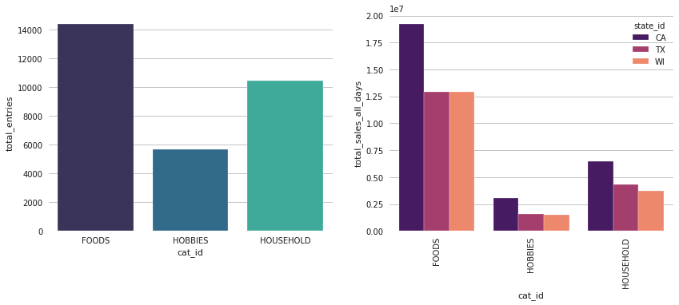

Hai biểu đồ trên cho thấy:

Hầu hết các mặt hàng được bán đều thuộc danh mục THỰC PHẨM, tiếp theo là ĐỒ DÙNG GIA ĐÌNH và CÁC MẶT HÀNG DỰA TRÊN SỞ THÍCH
CA dẫn đầu về số lượng "Tổng số mặt hàng" được bán trong một trong hai danh mục (THỰC PHẨM, ĐỒ DÙNG DỰA TRÊN SỞ THÍCH VÀ ĐỒ GIA DỤNG), trong khi WISCONSIN đứng sau TX trong mỗi danh mục ngoại trừ THỰC PHẨM. Chúng tôi sẽ xem liệu sự khác biệt tương tự có tác động đến doanh thu được trích từ các tiểu bang này hay không

In [ ]:
df3 = train_sales_df.groupby(['cat_id', 'store_id'])['total_sales_all_days'].sum().reset_index() # Nhóm thuộc tính

In [ ]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
fig, ax1 = plt.subplots(figsize=(14,5))
# Thiết lập các trục cho biểu đồ
sns.barplot(x = 'store_id', y='total_sales_all_days', hue='cat_id', data=df3, 
           palette='afmhot', ax=ax1)

plt.xticks(rotation=90)
plt.show() # Hiển thị biểu đồ

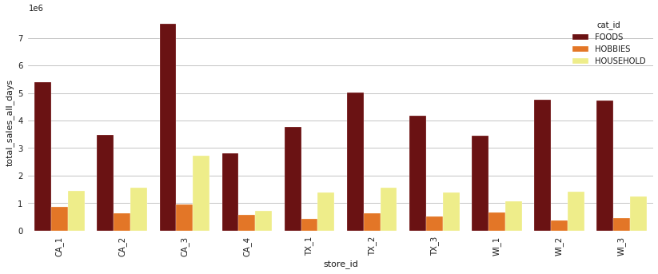

Kết quả giống nhau trên tất cả các cửa hàng

In [ ]:
df = train_sales_df.groupby(['state_id', 'cat_id'])['id'].count().reset_index(name='num_sales_by_category') # Nhóm thuộc tính
# Thiết lập các thuộc tính cho biểu đồ
fig = px.bar(df, x="state_id", y="num_sales_by_category", 
             color="cat_id", title="Distribution of Product_ids Count Across Categories & Each Locale")
fig.show() # Hiển thị biểu đồ

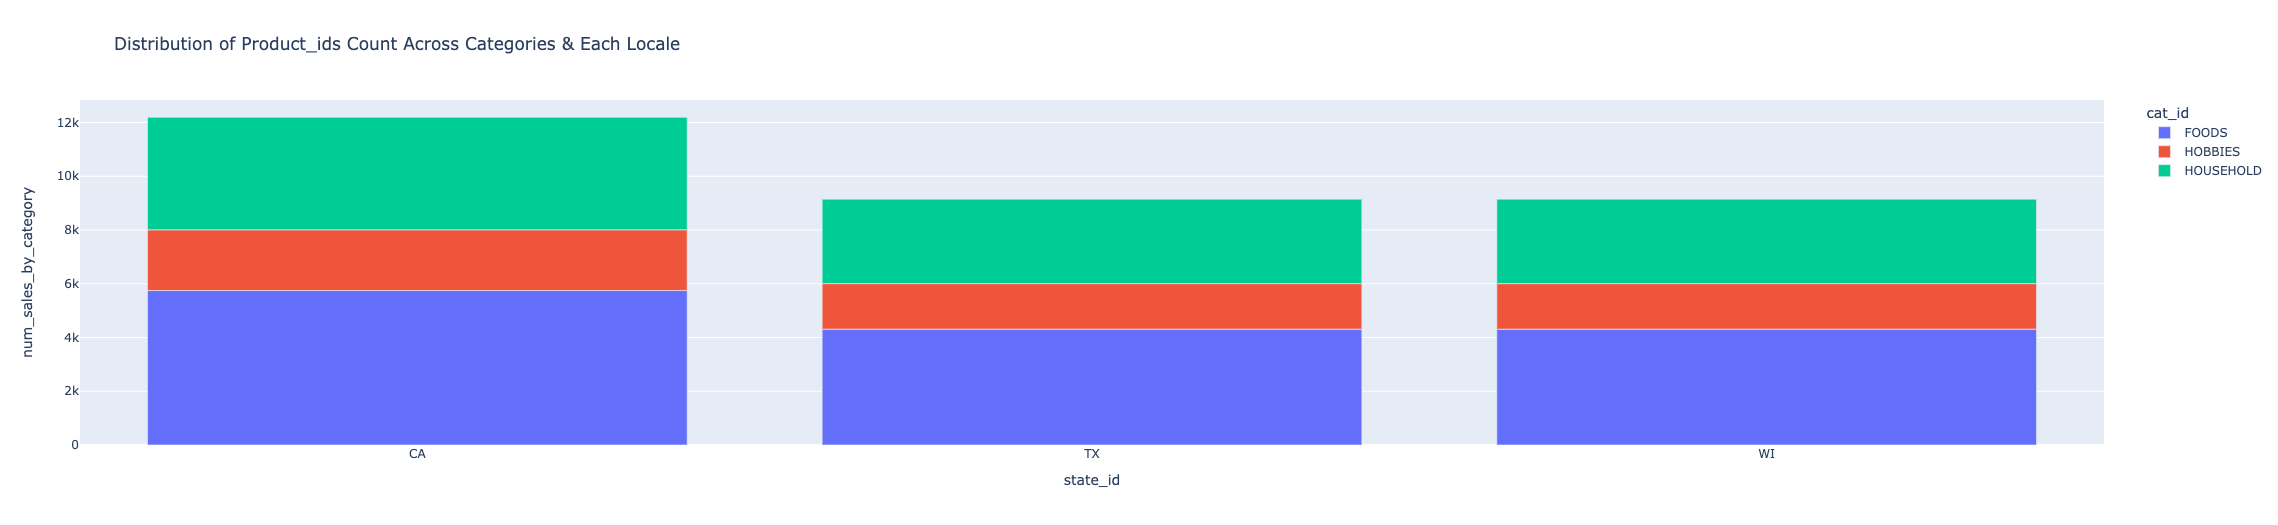

## **Phân phối các mặt hàng trên toàn bộ cửa hàng & Store_ids?**

In [ ]:
df = train_sales_df.groupby(['dept_id', 'store_id', 'state_id', 'cat_id'])[train_sales_df.columns[6:]].sum().reset_index() # Nhóm thuộc tính
df = df.sort_values('total_sales_all_days', ascending=False) # Sắp xếp các giá trị

In [ ]:
x_dept = df['dept_id']
x_store = df['store_id']

def items_sold_per_days(x_spec,title_text, title):

    cols = ['d_1', 'd_50', 'd_300', 'd_500', 'd_700', 'd_900', 'd_1100', 'd_1500', 'd_1700',
        'total_sales_all_days', 'median_sales_all_days']

    buttons1 = [dict(method = "restyle",
                 args = [{'x': [x_spec, 'undefined'],
                          'y': [df[cols[k]], 'undefined'],
                          'visible':[True, False]}], 
                 label = cols[k])   for k in range(0, len(cols))]

    fig = go.Figure()
    fig.add_trace(go.Bar(x=x_spec, y = df['d_1'], name='Dept.Sales on day2',
                     marker_color='Crimson'))

    fig.update_layout(title_text= title_text,
                  title_x= 0.4, width=750, height=450, 
                  margin=dict(t=100, b=20, l=0, r=0),
                  autosize = False,
                  updatemenus=[dict(active=0,
                                    buttons=buttons1,
                                    x=0.08,
                                    y=1.13,
                                    xanchor='left',
                                    yanchor='top')
                              ]); 

    fig.add_annotation( x=0.00,  y=1.13, showarrow=False, xref='paper', yref='paper', xanchor='left',
                   text="With<br>"+str(title));
    fig.show()

items_sold_per_days(df['store_id'], 'Distribution of Sales Made on Each Store', 'Stores')
items_sold_per_days(df['state_id'], "Distribution of Sales Made In Each State", 'States')

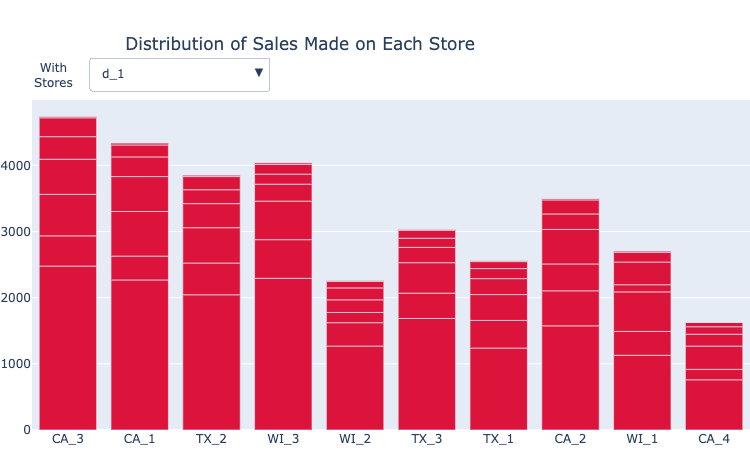

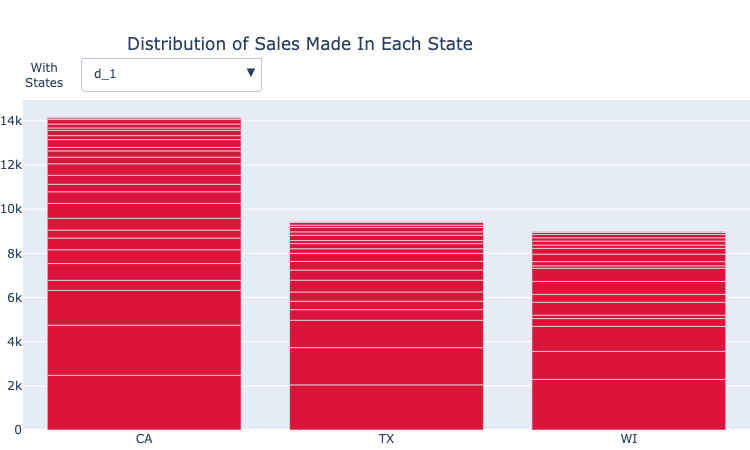

## **Specific Item OutSelling the Most?**

In [ ]:
train_sales_df.groupby(['id'])['total_sales_all_days'].sum().sort_values(ascending=False) # Nhóm thuộc tính

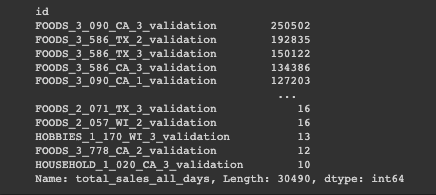

In [ ]:
sns.set_style('whitegrid')

def plot_dailysales(spec_id):
  
    train_sales_df.loc[train_sales_df['id'] == spec_id ].set_index('id')[d_cols]\
                .T\
                .plot(figsize = (13,2.5),
                      title =  str(spec_id)+"_item daily sales", 
                      color = next(color_cycle) )
    plt.legend()
    plt.show() # Hiển thị biểu đồ

plot_dailysales('FOODS_3_090_CA_3_validation') 
plot_dailysales('FOODS_3_586_TX_2_validation')

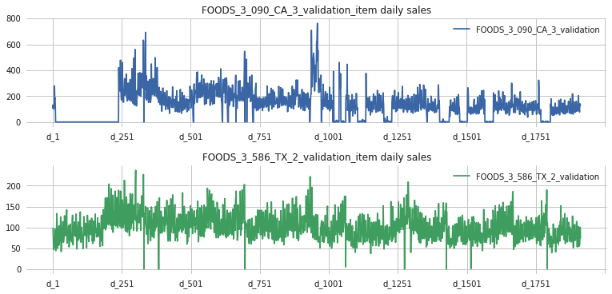

## **Item ID Outselling Most in Each Category?**

In [ ]:
df_agg = pd.DataFrame(train_sales_df.groupby(['id', 'cat_id', 'store_id'])['total_sales_all_days'].sum().sort_values(ascending=False)) # Nhóm thuộc tính
df_agg = df_agg.reset_index()
df_agg.head(3)

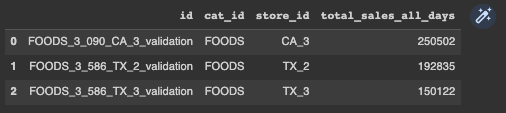

Bây giờ tập dữ liệu đã được sắp xếp theo thứ tự giảm dần của tổng doanh số bán hàng, sẽ dễ dàng hơn rất nhiều để ước tính item_id ('id') bán chạy hơn những mặt hàng khác trong mỗi danh mục

In [ ]:
# In ra màn hình các giá trị
print("The 3 item_ids outselling most in FOODS category are: {}".format(list(df_agg.loc[df_agg['cat_id'] == 'FOODS']['id'][:3])))
print("The 3 item_ids outselling most in HOUSEHOLDS category are: {}".format(list(df_agg.loc[df_agg['cat_id'] == 'HOUSEHOLD']['id'][:3])))
print("The 3 item_ids outselling most in HOBBIES category are: {}".format(list(df_agg.loc[df_agg['cat_id'] == 'HOBBIES']['id'][:3])))

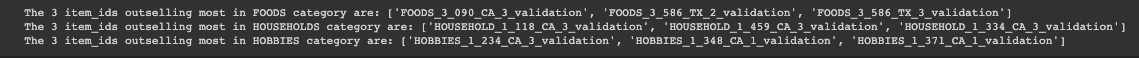

In [ ]:
df = pd.DataFrame({"days": list(train_sales_df[train_sales_df['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].columns),
                   "sales_data": list(train_sales_df[train_sales_df['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].values.flatten())})

In [ ]:
#fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 7))

def plot_sample_sales(spec_id, sm_start, sm_end, samples_pick=50):

    fig, ax1 = plt.subplots(figsize=(13, 2.5))
    
    x1 = list(train_sales_df[train_sales_df['id'] == spec_id][d_cols]\
              .columns)[sm_start:sm_end]
    y1 = list(train_sales_df[train_sales_df['id'] == spec_id][d_cols]\
              .values.flatten())[sm_start:sm_end]
    
    #this conversion for regplot only
    x1 = [x.replace("d_", "") for x in x1]
    x1 = [int(x) for x in x1]
    
    #sns.lineplot(x=x1, y=y1, ax=ax1)
    sns.regplot(x=x1, y=y1, order=10, ax=ax1)
    ax1.set_ylabel("Number of Sales")
    ax1.set_xlabel("Days")

    ax1.set_xticks(x1[::samples_pick])
    ax1.set_xticklabels(x1[::samples_pick], rotation=0)

    fig.tight_layout()
    plt.show() # Hiển thị biểu đồ

In [ ]:
plot_sample_sales('FOODS_3_090_CA_3_validation', 500, 1300)
plot_sample_sales('FOODS_3_586_TX_2_validation', 500, 1300)
plot_sample_sales('FOODS_3_090_CA_1_validation', 500, 1300)

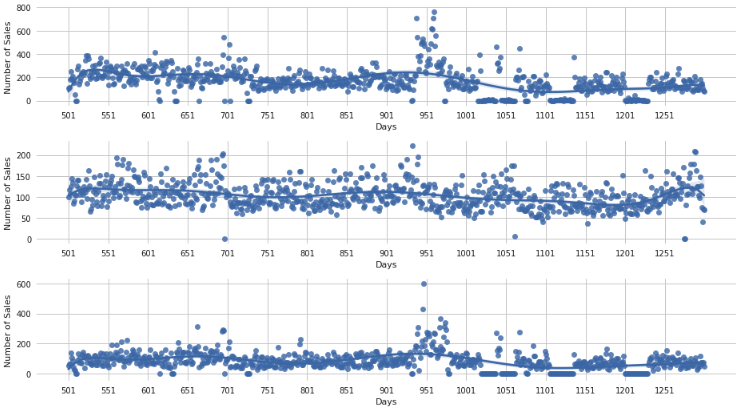

# **Questions on Sales Revenue?**

Trước hết, chúng tôi muốn tìm hiểu xem doanh thu cụ thể đối với từng sản phẩm là bao nhiêu? Nhưng vì chúng tôi chưa được cung cấp tập dữ liệu với id (product_ids) trong sell_prices_df (khung dữ liệu doanh thu) và có sự không khớp trong các mục nhập tập dữ liệu giữa cả hai tập dữ liệu (train_sales_df với gần 30000 hàng và sell_prices_df với gần 6 triệu mục nhập), do đó, tốt nhất là , một ước tính sơ bộ có thể được thực hiện bằng cách hợp nhất cả hai tập dữ liệu.

May mắn thay, Khung dữ liệu doanh thu (sell_prices_df) có sẵn dữ liệu cấp phân loại, vì vậy chúng tôi có thể ước tính về các mặt hàng được bán trong từng danh mục để xem giá cụ thể nơi hầu hết các mặt hàng được bán là bao nhiêu.

Trước tiên, chúng tôi sẽ thử điều chỉnh phương pháp phân phối xác suất phi tham số vì chúng tôi nghi ngờ rằng phân phối dữ liệu có thể không phải là bản sao chính xác của phân phối mà chúng tôi đã thấy trước đây và có thể bao gồm các đỉnh hoặc giá trị ngoại lai. (https://machinelearningmastery.com/probability-density-estimation/)

Nếu hành vi phân phối dữ liệu không giống với một phân phối đã biết, thì việc điều tra thêm sẽ được thực hiện để loại bỏ các dữ liệu ngoại lệ cụ thể

In [ ]:
sell_prices_df.head(3)

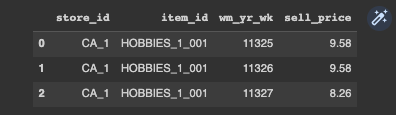

In [ ]:
# Tạo cột category chèn vào cột item_id
sell_prices_df['category'] = sell_prices_df['item_id'].str.split("_", expand=True)[0]

## **Distribution of Price Among Categories?**

In [ ]:
sns.set_style('whitegrid')

def kde_plotting(df, category, bin_size, color, label):
    
    fig, ax1 = plt.subplots(figsize=(13, 2.5) )

    sns.distplot(df[df['category'] == category]['sell_price'], 
               axlabel = label ,bins=bin_size, color = color, ax=ax1) 

    fig.tight_layout()
    ax1.set_xscale('log')
    plt.legend()
    plt.show()
    
kde_plotting(sell_prices_df, 'HOBBIES', 150, 'b', 'hobbies')   
kde_plotting(sell_prices_df, 'FOODS', 250, 'g', 'foods') 
kde_plotting(sell_prices_df, 'HOUSEHOLD', 150, 'r', 'household')

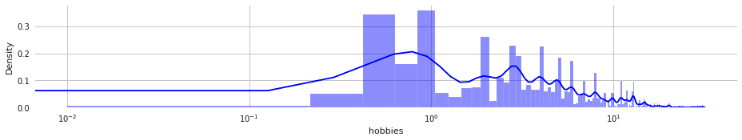

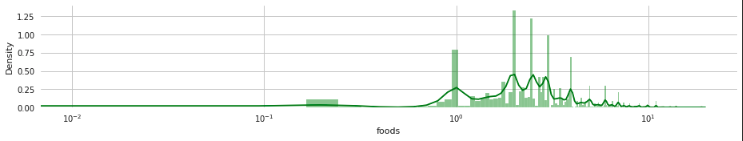

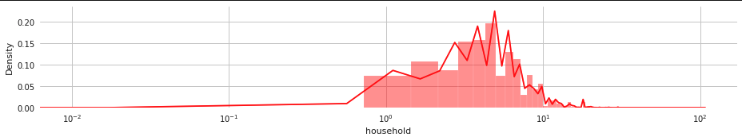

## **Removing Outliers to Observe Price Distribution?**

### **Phương pháp Quartile**

In [ ]:
def remove_outliers(df):
    
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    
    return df_final

df = sell_prices_df[['category', 'sell_price']]
df = remove_outliers(df)

In [ ]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
plt.figure(figsize=(13,3))
sns.boxplot(y=df['category'], x=df['sell_price'])
plt.show() # Hiển thị biểu đồ

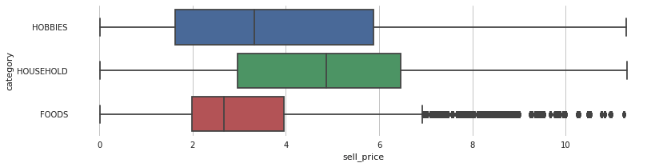

Sau khi loại bỏ hầu hết các ngoại lệ, rõ ràng là đối với

Các mặt hàng liên quan đến THỰC PHẨM, 75% các mặt hàng được bán là những mặt hàng có giá dưới 4 đô la
Các mặt hàng liên quan đến HOBBIES, 75% các mặt hàng được bán dưới 6 đô la với giá trung bình tập trung vào khoảng 3,25-3,5 đô la
Mặt hàng GIA DỤNG, 75% mặt hàng được bán dưới 6,5 đô la.
Nó cũng thể hiện rằng có khá nhiều ngoại lệ trong dữ liệu giá của chúng tôi. Vì chúng tôi đã quan sát trước khi sử dụng kdeplots, rằng phân phối của tập dữ liệu chủ yếu bị lệch, chúng tôi đã sử dụng phương pháp phần tư để loại bỏ các giá trị ngoại lệ.

(https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outaries-with-python-code/)

## **Distribution of Sales On Weekdays & Special Occasions?**

Tập dữ liệu thứ ba của chúng tôi có tên, calendar_df, cung cấp thông tin có giá trị theo thời gian cho tập dữ liệu product_id. Tập dữ liệu này cũng chứa thông tin về các dịp Đặc biệt, SNAP (Supplementary Nutrition Assistance Programme) ở Hoa Kỳ và cùng với tập dữ liệu product_id, tức là train_sales_df sẽ hữu ích trong việc quan sát doanh số bán hàng cùng các ngày trong tuần, các ngày cụ thể và các dịp đặc biệt

In [ ]:
calendar_df.head(3)

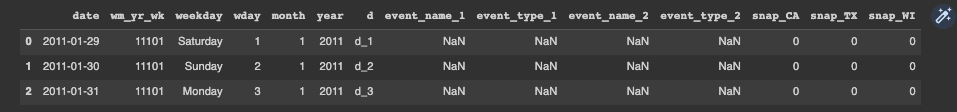

In [ ]:
calendar_df.groupby(['event_name_1', 'event_type_1'])['wday'].count()

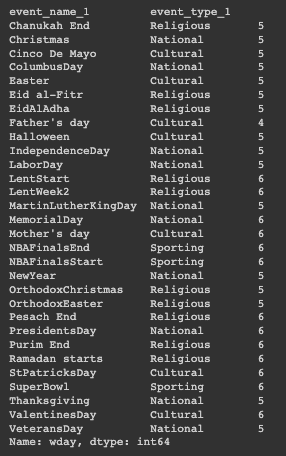

In [ ]:
calendar_df.groupby(['event_name_2', 'event_type_2'])['wday'].count()

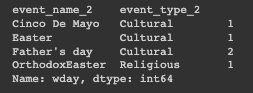

In [ ]:
calendar_df['days'] = [d.split('-')[2] for d in calendar_df['date']]
calendar_df['events_names'] = pd.concat([calendar_df['event_name_1'], calendar_df['event_name_2']], 
                                        ignore_index=True)
calendar_df['events_types'] = pd.concat([calendar_df['event_type_1'], calendar_df['event_type_2']], 
                                        ignore_index=True)

## **What are SNAP_CA, SNAP_TX, SNAP_WI?**

SNAP là viết tắt của "Supplementary Nutrition Assistance Program" là một chương trình cấp liên bang nhằm cung cấp thực phẩm thiết yếu cho các hộ gia đình có thu nhập thấp. Chương trình này hướng tới việc cung cấp các thực phẩm cần thiết và trong bộ dữ liệu hiện tại, danh mục các vật dụng gia đình và các vật dụng sở thích không nằm trong yêu cầu của chương trình này.

Chương trình này chỉ nhằm mục đích chống lại nạn đói lương thực ở Mỹ và chỉ có thể mua các mặt hàng liên quan đến thực phẩm trong chương trình này

In [ ]:
df = calendar_df.groupby(['events_types'])['snap_CA'].value_counts().reset_index(name='counts')

In [ ]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
plt.figure(figsize=(13,3))
sns.barplot(x = 'events_types', y='counts', hue='snap_CA', data=df, palette='bwr')
plt.show()

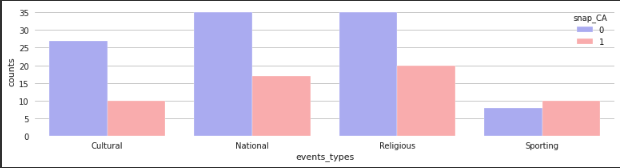

In [ ]:
df = calendar_df.groupby(['events_names'])['snap_CA'].value_counts().reset_index(name='counts')

In [ ]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
plt.figure(figsize=(13,3))
sns.barplot(x = 'events_names', y='counts', hue='snap_CA', data=df, 
            order = df.sort_values(['counts'], ascending=False).events_names, 
            palette='OrRd')
plt.xticks(rotation=90)
plt.show()  # Hiển thị biểu đồ

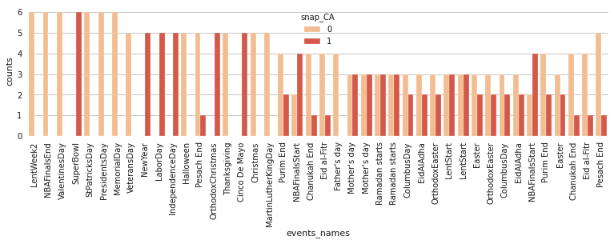

## **Distribution of Sales Items vs Sales Revenue?**


In [ ]:
train_sales_prices_df = train_sales_df.merge(sell_prices_df, how='inner', left_index=True, right_index=True, validate="1:1")

In [ ]:
df = train_sales_prices_df.groupby(['cat_id', 'state_id', 'store_id_x'])['sell_price'].sum().reset_index(name='total_revenue')
df = df.sort_values(by='total_revenue', ascending=False)

In [ ]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

sns.barplot(x = 'state_id', y='total_revenue', data=df, 
            palette='coolwarm', ax=ax1)
sns.barplot(x = 'cat_id', y='total_revenue', hue='state_id', data=df, 
            palette='plasma', ax=ax2)

plt.xticks(rotation=90)
plt.show()

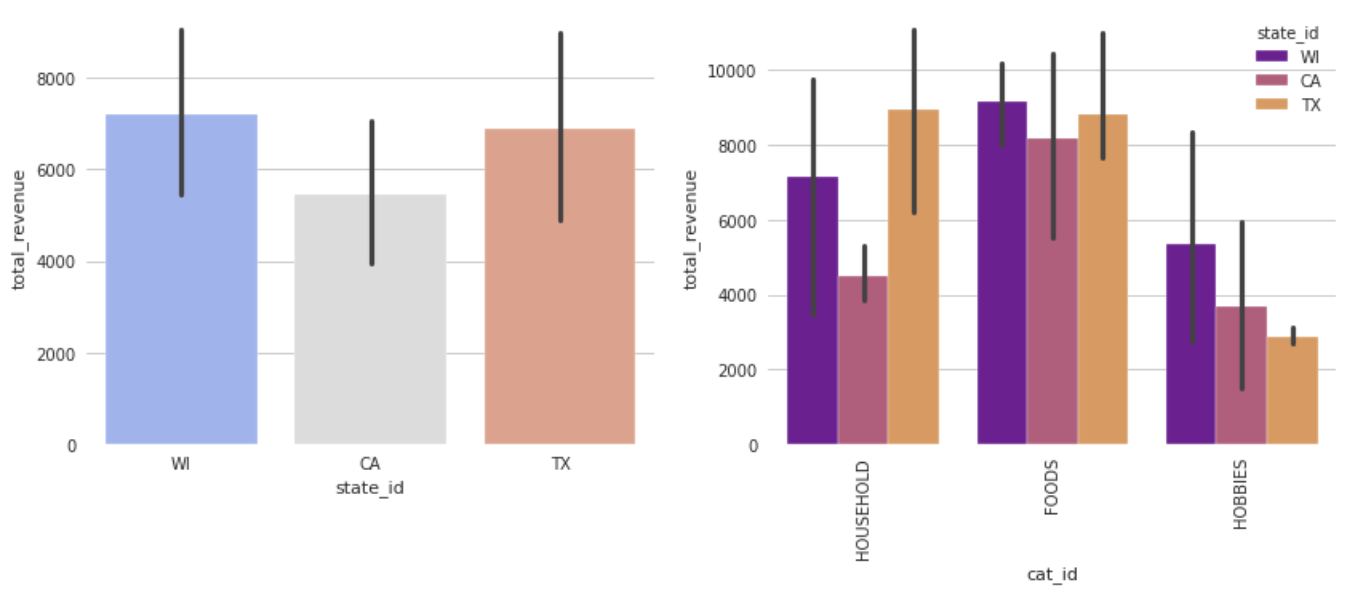

Mặc dù thực tế là dữ liệu giá bán chứa gần 6 triệu mục nhập, trong trường hợp hiện tại, chúng tôi chỉ đang xem xét các mục nhập chung giữa df doanh thu và df product_ids. Một số thông tin chi tiết quan trọng đã được đưa ra.

Mặc dù chúng tôi nhận thấy rằng California luôn là tiểu bang nơi các product_id độc nhất bán được nhiều nhất được thực hiện, nhưng doanh thu cao nhất thu được đến từ các cửa hàng ở Bang Wisconsin
Tương tự, trong việc phân phối Danh mục, WI và TX tạo ra doanh thu bán hàng nhiều hơn so với các cửa hàng ở CA.
Wisconsin dẫn đầu doanh thu về THỰC PHẨM và ĐỒ DÙNG SỞ THÍCH, trong khi Texas dẫn đầu doanh thu về ĐỒ GIA DỤNG.
CA có xu hướng đóng góp doanh thu nhỏ nhất trong cả ba tiểu bang, mặc dù có doanh số bán các mặt hàng nhiều nhất tại các cửa hàng của mình

In [ ]:
train_sales_cal_df = train_sales_df.set_index('id')[d_cols].T.merge(calendar_df.set_index('d'), left_index=True, right_index=True, validate="1:1").set_index('date')

In [ ]:
train_sales_cal_df.T

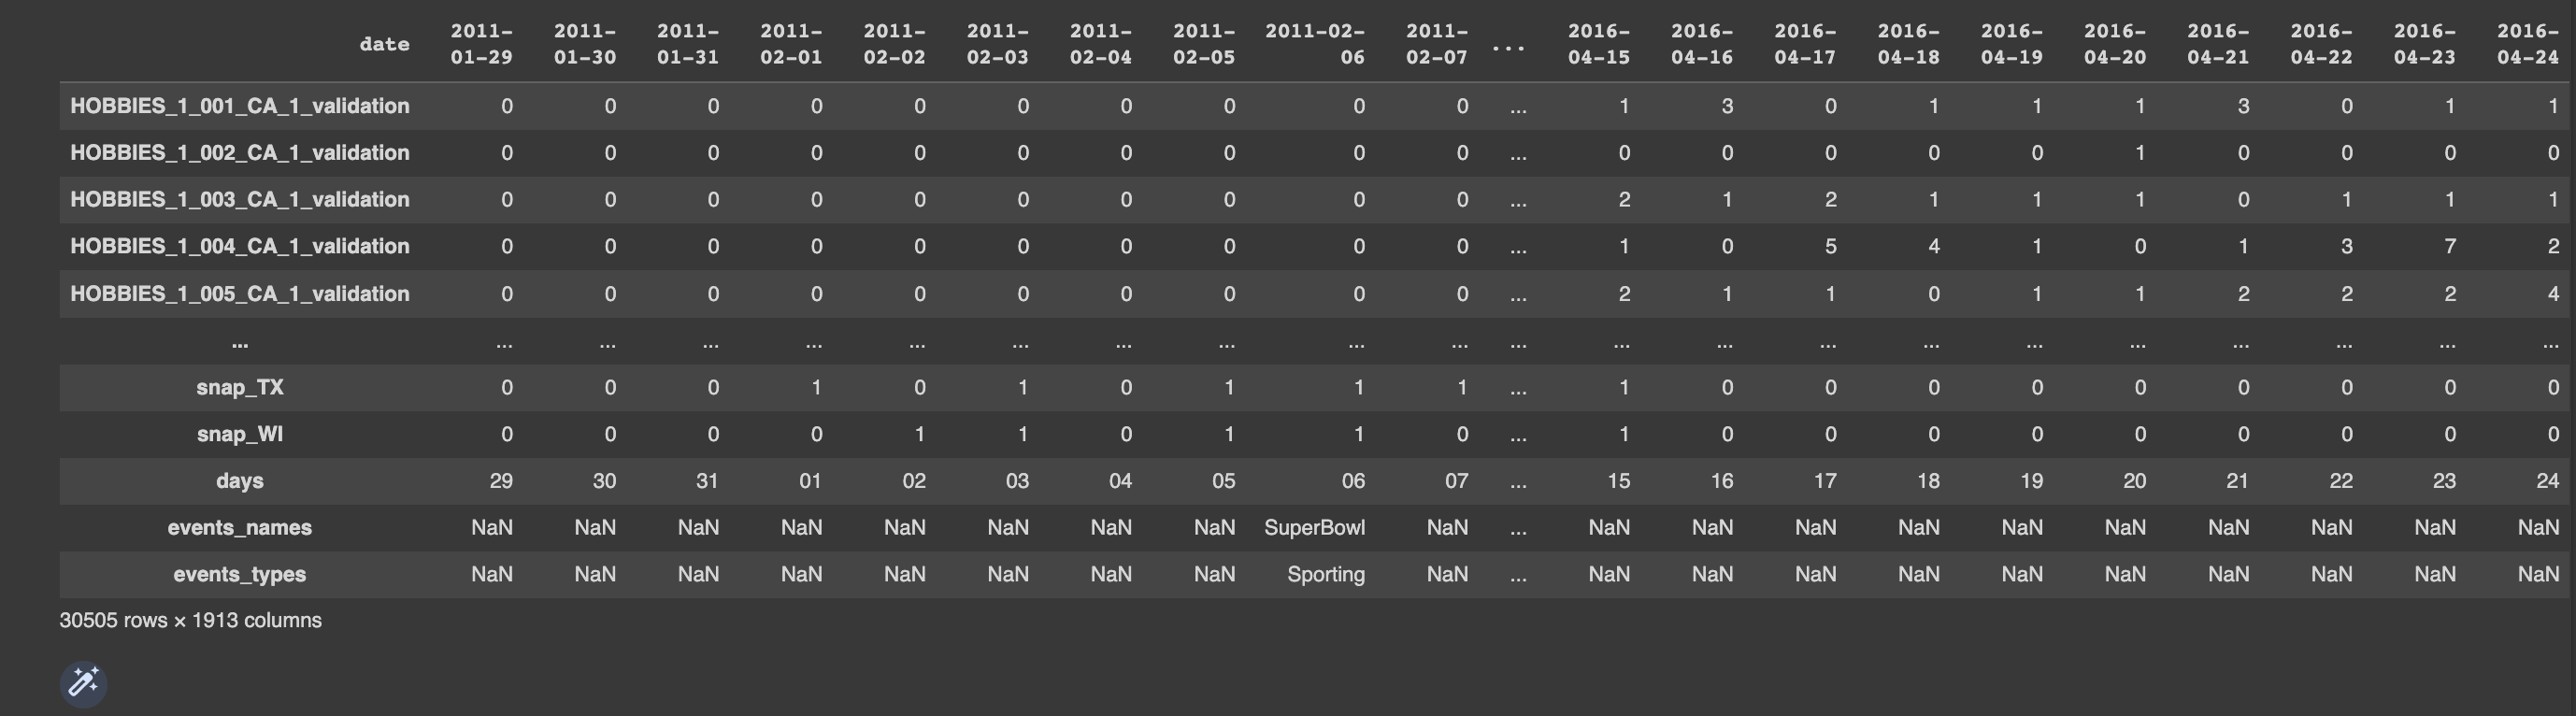

## **Hành vi trên chuỗi thời gian và phân tích**

Các câu hỏi liên quan về chuỗi thời gian sẽ liên quan đến việc hợp nhất các tập dữ liệu của product_ids và thông tin dữ liệu để cho phép phân tích kỹ lưỡng theo thời gian. Chúng tôi có thể tìm hiểu thông tin về doanh số bán các mặt hàng cùng với chuỗi thời gian và cũng có thể tìm hiểu những tác động cụ thể, những ngày cuối tuần và các dịp đặc biệt có thể có đối với số lượng đơn vị bán được

Trung bình cuộn: Trung bình cuộn là một công cụ hữu ích để sử dụng để hiểu các tác động lâu dài trong dữ liệu được trình bày theo thời gian. Cơ sở lý luận đằng sau việc sử dụng trung bình cuộn là thực tế là việc đọc kết quả từ trung bình cuộn sẽ giúp dữ liệu mượt mà hơn so với những biến động hàng ngày và có thể giúp các chuyên gia dữ liệu hiểu được tác động lâu dài của doanh số bán hàng / khoảng không quảng cáo theo thời gian. Do đó, chúng tôi sẽ sử dụng cả hai đường trung bình như một công cụ cần thiết để hỗ trợ

### **Distribution of Total Sales Against Product_id on TimeSeries?**

In [ ]:
calendar_df.date = pd.to_datetime(calendar_df.date)
type(calendar_df.date)

pandas.core.series.Series

In [ ]:
train_sales_cal_df = train_sales_df.set_index('id')[d_cols].T.merge(calendar_df.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')
train_sales_cal_df['total_sales'] = train_sales_cal_df.sum(axis=1)

In [ ]:
train_sales_cal_df = train_sales_cal_df[['total_sales']]
train_sales_cal_df = train_sales_cal_df.reset_index()

In [ ]:
fig = px.line(train_sales_cal_df, x='date', y="total_sales", 
             template = 'plotly_white', title = 'Total Sales by Product id', 
             width=800, height=450)

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    xaxis=dict(
    rangeselector=dict( buttons=list([ dict(count=1, label="1m", step="month", stepmode="backward"),
    dict(count=6,label="6m", step="month", stepmode="backward"),
    dict(count=1, label="YTD", step="year", stepmode="todate"),
    dict(count=1, label="1y", step="year", stepmode="backward"),
    dict(step="all")
            ]) 
                      ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

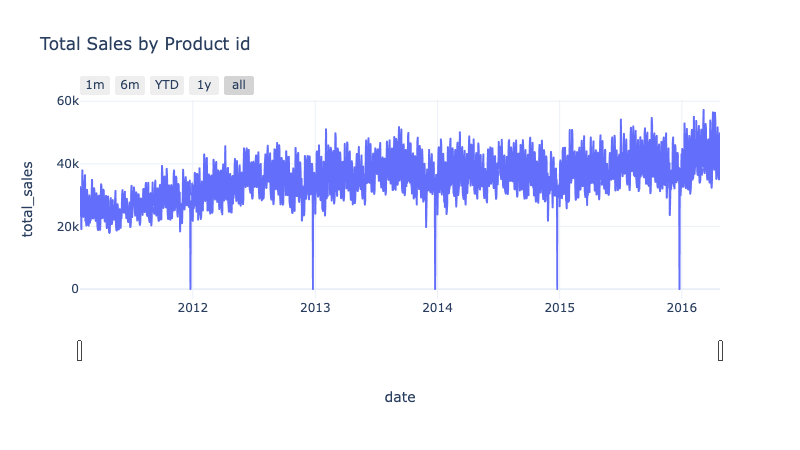

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

def time_series_decompose(df, model_specified, period):

    df_decomposition = seasonal_decompose(
                               x=df.set_index(['date']), 
                               model= model_specified, 
                               period=period)
    
    est_trend = df_decomposition.trend
    est_trend = est_trend.reset_index(name='trend').set_index('date')
    est_seasonal = df_decomposition.seasonal
    est_seasonal = est_seasonal.reset_index(name='seasonal').set_index('date')
    est_residual = df_decomposition.resid
    est_residual = est_residual.reset_index(name='resid').set_index('date')
    
    return est_trend, est_seasonal, est_residual

sample_time_s1 = train_sales_cal_df[400:700]
est_trend, est_seasonal, est_residual = time_series_decompose(sample_time_s1, 
                                                              'multiplicative', 30)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 7))

est_trend.plot(figsize=(15, 5) ,
                 alpha=0.9, 
                 lw=3, ax = ax1)
est_seasonal.plot(figsize=(15, 5) ,
                 alpha=0.9, 
                 lw=3, ax = ax2)
est_residual.plot(figsize=(15, 5) ,
                 alpha=0.9, 
                 lw=3, ax = ax3)

fig.tight_layout()
plt.show()

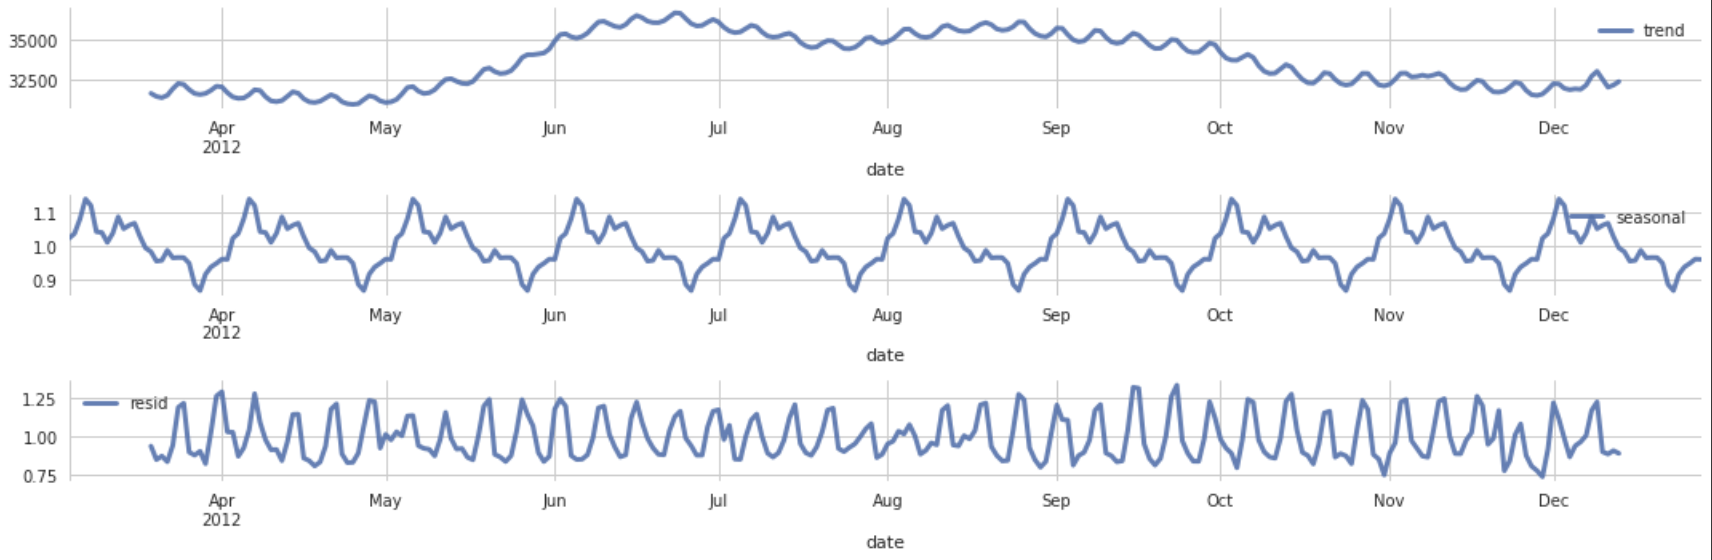

In [ ]:
train_sales_cal_df = train_sales_cal_df.set_index('date')

In [ ]:
def time_and_rolling_plot(df, title_text, rolling_days=30, height=2.2):

    sns.set_style('whitegrid')
    fig, ax1 = plt.subplots(1, 1, figsize=(13, height))
    df.plot(figsize=(13, height),
                        alpha=0.8,
                        title="Time Plot for the " + str(title_text), 
                        lw=2, color=next(color_cycle), ax=ax1)
    df.rolling(rolling_days).mean().plot(figsize=(13, height),
                                          alpha=1, 
                                          legend="Rolling Mean on 30 days", 
                                          lw=2.5, color=next(color_cycle), ax=ax1)
    ax1.legend(['Total Sales Per Category', 'total_sales_rolling_mean'])
    plt.show()

In [ ]:
time_and_rolling_plot(train_sales_cal_df, 'Total_Sales_Data')

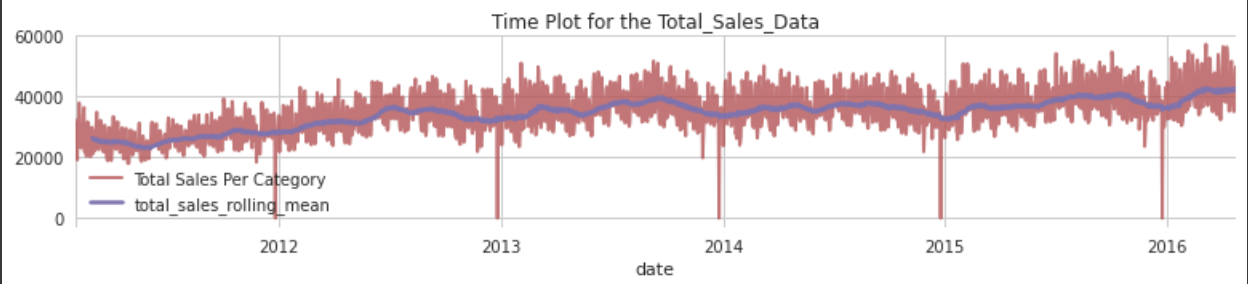

In [ ]:
#Tìm product_ids trong 25 đơn vị được bán nhiều nhất
train_sales_most_sold_25 = train_sales_df.groupby(['id'])['total_sales_all_days'].sum().sort_values(ascending=False)[:25]
train_sales_most_sold_25 = train_sales_most_sold_25.reset_index(name='total_sales')
train_sales_most_sold_25.iloc[0:5]

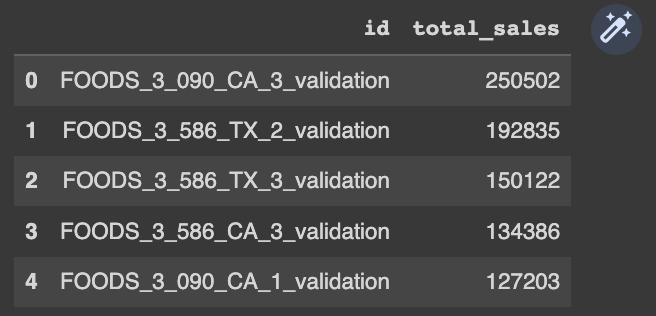

In [ ]:
train_sales_most_sold_25['state'] = train_sales_most_sold_25['id'].str.split("_", expand=True)[3]
train_sales_most_sold_25.groupby(['state'])['total_sales'].sum().sort_values(ascending=False)

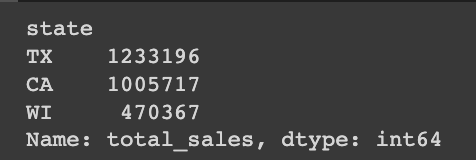

In [ ]:
train_sales_cal_df = train_sales_df.set_index('id')[d_cols].T.merge(calendar_df.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')

In [ ]:
time_and_rolling_plot(train_sales_cal_df[['FOODS_3_586_WI_3_validation']], "Product_id_FOODS_3_586_WI_3_validation")
time_and_rolling_plot(train_sales_cal_df[['FOODS_3_090_CA_1_validation']], "Product_id_FOODS_3_090_CA_1_validation")
time_and_rolling_plot(train_sales_cal_df[['FOODS_3_586_CA_3_validation']], "Product_id_FOODS_3_586_CA_3_validation")
time_and_rolling_plot(train_sales_cal_df[['FOODS_3_090_TX_2_validation']], "Product_id_FOODS_3_090_TX_2_validation")
time_and_rolling_plot(train_sales_cal_df[['FOODS_3_120_CA_3_validation']], "Product_id_FOODS_3_120_CA_3_validation")
time_and_rolling_plot(train_sales_cal_df[['FOODS_3_252_TX_3_validation']], "Product_id_FOODS_3_252_TX_3_validation")

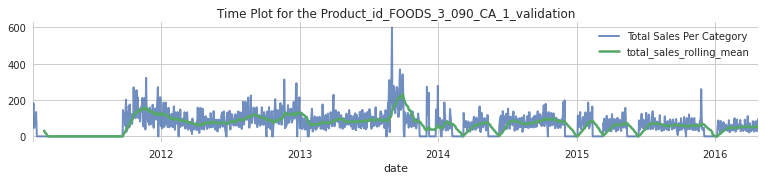

### **Distribution of Total Sales Against Each Category?**

In [ ]:
train_sales_cal_df = train_sales_df.groupby(['cat_id'])[d_cols].sum().\
                                                T.merge(calendar_df.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')

In [ ]:
train_sales_cal_df.head(2)

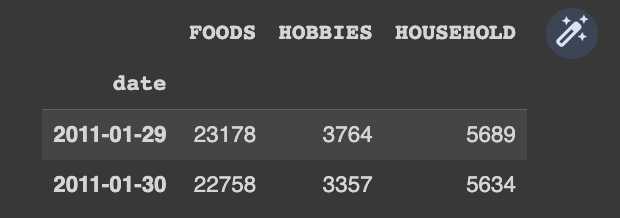

In [ ]:
def plotly_time_plot_markers(df, text, samples_onwards=1000):

    fig = go.Figure()
    for c in df.columns[:4]:
        fig.add_traces(go.Scatter(x=train_sales_cal_df[samples_onwards:].index, 
                              y=train_sales_cal_df[samples_onwards:][c],
                              mode='markers',
                              name = c))

    fig.update_layout( title = 'Sales per Day by ' + str(text), template = 'plotly_white',
        width=750, height=550,
        xaxis_tickformatstops = [
            dict(dtickrange=["M1", "M12"], value="%b '%y"),
        ]
    )
    
    fig.update_layout(
    xaxis=dict(
    rangeselector=dict( buttons=list([ dict(count=1, label="1m", step="month", stepmode="backward"),
    dict(count=6,label="6m", step="month", stepmode="backward"),
    dict(count=1, label="YTD", step="year", stepmode="todate"),
    dict(count=1, label="1y", step="year", stepmode="backward"),
    dict(step="all") ])  ),
        rangeslider=dict(
            visible=True
        ),
        type="date" ) )

    fig.update_xaxes(rangeslider_visible=True)    
    fig.show()    

plotly_time_plot_markers(train_sales_cal_df, 'Category')  

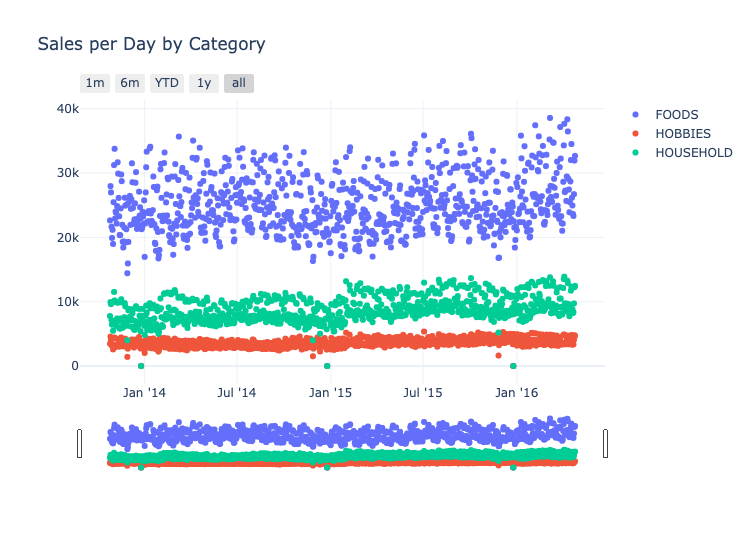

### **Distribution of Total Sales Sold Per State?**

In [ ]:
train_sales_cal_df = train_sales_df.groupby(['state_id'])[d_cols].sum().T.merge(calendar_df.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')

In [ ]:
train_sales_cal_df

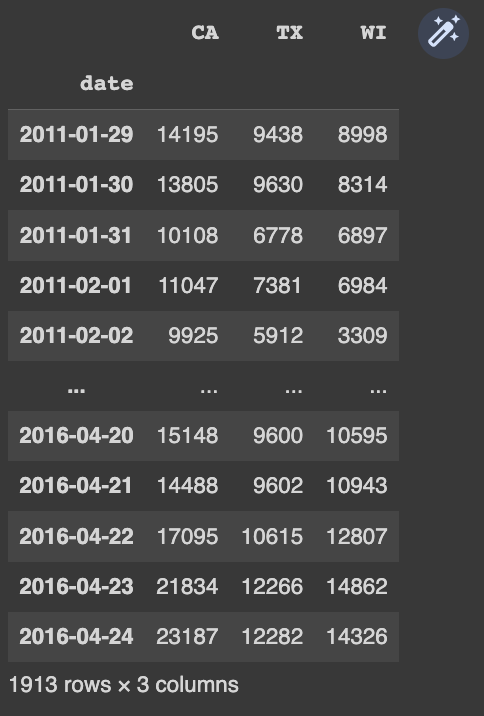

In [ ]:
from plotly.subplots import make_subplots

def plotly_time_plot_rolling(df, text, start_col=0, end_col=3, rolling_days=30):

    fig = go.Figure()
    for c in df.columns[start_col:end_col]:
        fig.add_traces(go.Scatter(x=df.rolling(rolling_days).mean().index, 
                              y=df.rolling(rolling_days).mean()[c],
                              mode='lines+markers',
                              name = c))

    fig.update_layout( title = 'Sales per Day by ' + str(text), template = 'plotly_white',
        width=750, height=550,
        xaxis_tickformatstops = [
            dict(dtickrange=["M1", "M12"], value="%b '%y"),
        ]
    )
    
    fig.update_layout(
    xaxis=dict(
    rangeselector=dict( buttons=list([ dict(count=1, label="1m", step="month", stepmode="backward"),
    dict(count=6,label="6m", step="month", stepmode="backward"),
    dict(count=1, label="YTD", step="year", stepmode="todate"),
    dict(count=1, label="1y", step="year", stepmode="backward"),
    dict(step="all") ])  ),
        rangeslider=dict(
            visible=True
        ),
        type="date" ) )

    fig.update_xaxes(rangeslider_visible=True)    
    fig.show()   

plotly_time_plot_rolling(train_sales_cal_df, 'State')

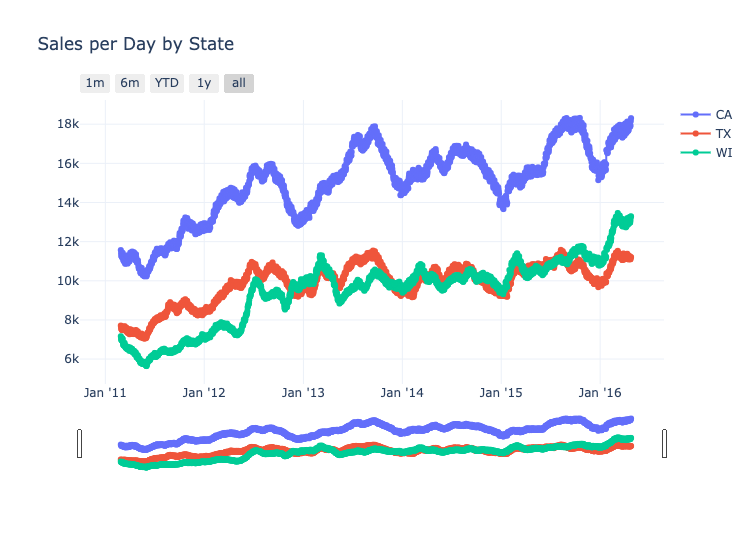

In [ ]:
train_sales_cal_df = train_sales_df.groupby(['state_id', 'cat_id'])[d_cols].sum().T\
              .join(pd.concat([calendar_df.set_index('d')['date']], axis=1, keys=['dates']))
train_sales_cal_df.head(2)

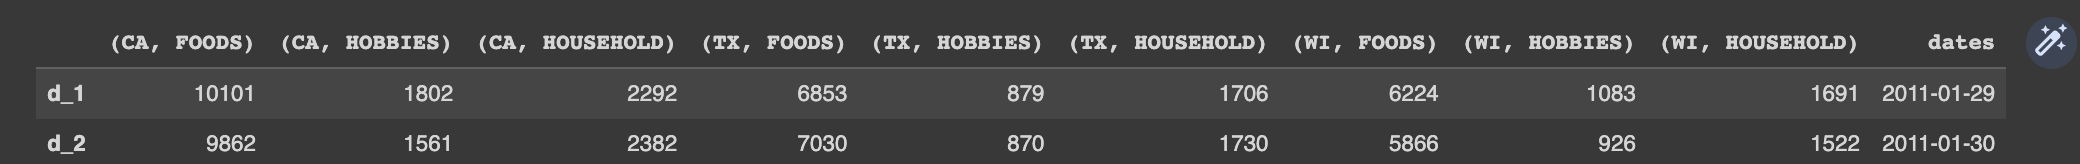

In [ ]:
select_cols_ca = [c for c in train_sales_cal_df.columns if 'CA' in c]
select_cols_tx = [c for c in train_sales_cal_df.columns if 'TX' in c]
select_cols_wi = [c for c in train_sales_cal_df.columns if 'WI' in c]
train_sales_df['total_sales_all_days'] = train_sales_df[d_cols].sum()

df_CA = train_sales_cal_df.set_index('dates')[select_cols_ca]
df_TX = train_sales_cal_df.set_index('dates')[select_cols_tx]
df_WI = train_sales_cal_df.set_index('dates')[select_cols_wi]

df_CA.columns = [col[1] for col in df_CA.columns]
df_TX.columns = [col[1] for col in df_TX.columns]
df_WI.columns = [col[1] for col in df_WI.columns]

In [ ]:
time_and_rolling_plot(df_CA, 'CA(California) FOODS, HOBBIES and HOUSEHOLD', height=2.7)
time_and_rolling_plot(df_TX, 'TX(Texas) FOODS, HOBBIES and HOUSEHOLD', height=2.7)
time_and_rolling_plot(df_WI, 'WI(Wisconsin) FOODS, HOBBIES and HOUSEHOLD', height=2.7)

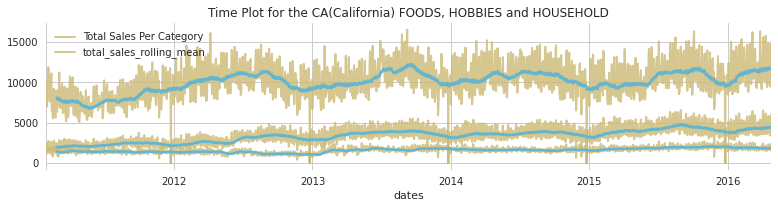

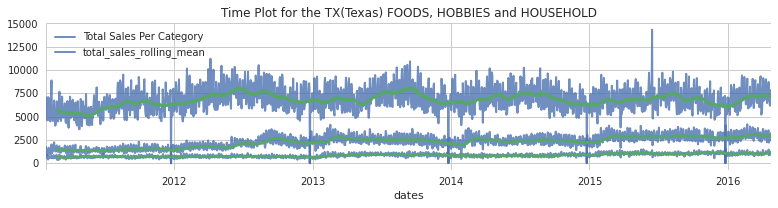

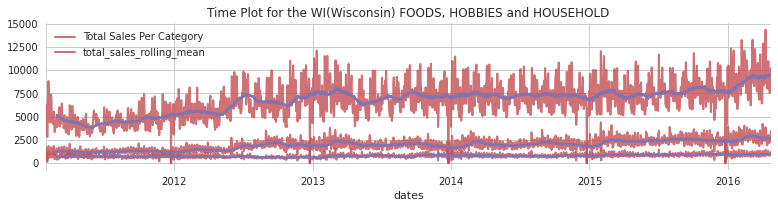

In [ ]:
train_sales_cal_df = train_sales_df.set_index('id')[d_cols].T.merge(calendar_df.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')
train_sales_cal_df['total_sales'] = train_sales_cal_df.sum()

In [ ]:
item_ids = [c for c in train_sales_cal_df.columns if 'validation' in c]

In [ ]:
train_sales_cal_df = train_sales_cal_df.reset_index()
train_sales_cal_df['date'] = pd.to_datetime(train_sales_cal_df['date'])
train_sales_cal_df['month'] = train_sales_cal_df.date.dt.month
train_sales_cal_df['year'] = train_sales_cal_df.date.dt.year

In [ ]:
df = train_sales_cal_df.groupby(['year', 'month'])[item_ids].sum()
df = df.reset_index()

In [ ]:
def find_items_per_specific_date(df, year, month, category, number):
    
    df = df.loc[(df['year'] == year) & (df['month'] == month)][item_ids].T.reset_index()
    df.columns = ['item_id', 'sales_count']
    df = df.set_index('item_id')
    item_type = [c for c in df.index if category in c]
    df = df[df.index.isin(item_type)]
    df = df.sort_values(by = ['sales_count'], ascending=False)[:number]
    
    return df

print("Most sold Foods during requested date\n"
      ,find_items_per_specific_date(df, 2012, 7, 'FOODS', 5) )
print("Most sold Household items during requested date\n" 
      ,find_items_per_specific_date(df, 2013, 3, 'HOUSEHOLD', 5) )

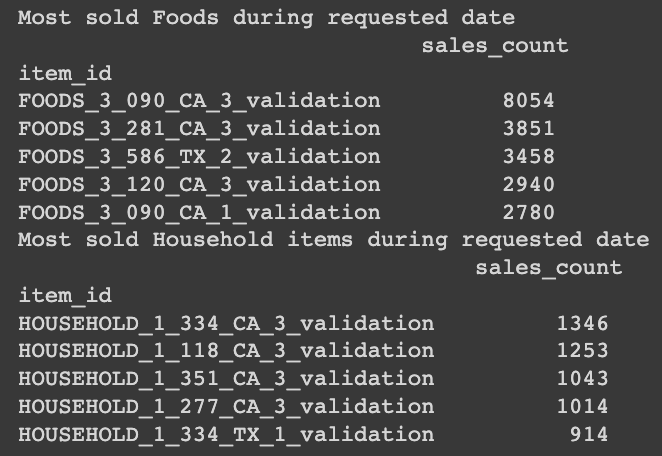

### **Distribution of Total Sales Vs Store_ID?**

In [ ]:
train_sales_cal_df = train_sales_df.groupby(['store_id'])[d_cols].sum()\
                                                .T.merge(calendar_df.set_index('d')['date'], 
                                                        left_index=True, right_index=True,
                                                        validate="1:1").set_index('date')

In [ ]:
train_sales_cal_df.head(2)

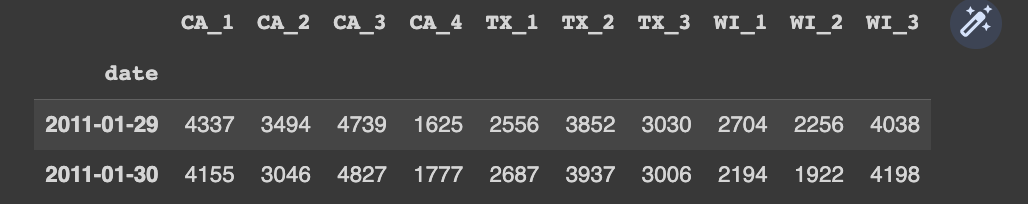

In [ ]:
plotly_time_plot_rolling(train_sales_cal_df, 'Store', start_col=4, end_col=7)

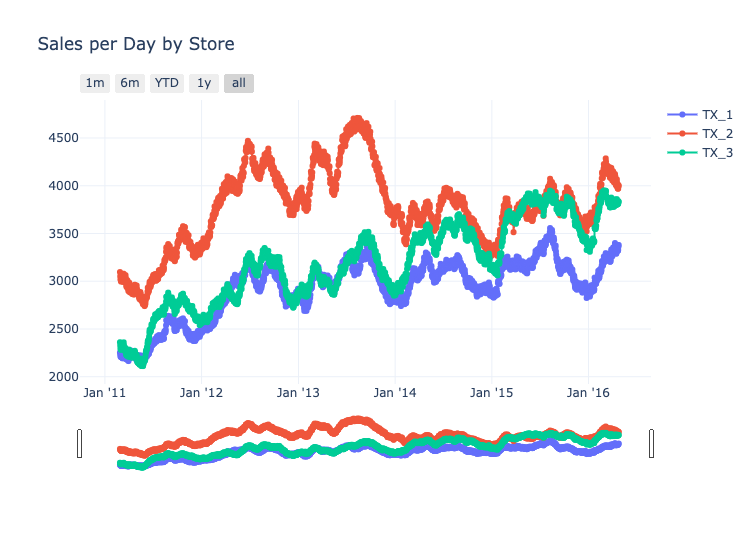

### **Distribution of Sales Per Specific Days/Weekends?**

In [ ]:
train_sales_cal_df = train_sales_df.groupby(['cat_id'])[d_cols].sum().\
                                                T.merge(calendar_df.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')

In [ ]:
train_sales_cal_df = train_sales_cal_df.reset_index()
train_sales_cal_df['date'] = pd.to_datetime(train_sales_cal_df['date'])
train_sales_cal_df['month'] = train_sales_cal_df.date.dt.month
train_sales_cal_df['day'] = train_sales_cal_df.date.dt.day
train_sales_cal_df['year'] = train_sales_cal_df.date.dt.year
train_sales_cal_df['weekday'] = train_sales_cal_df.date.dt.weekday
train_sales_cal_df['weekday'] = train_sales_cal_df.date.dt.day_name()
train_sales_cal_df.head(2)

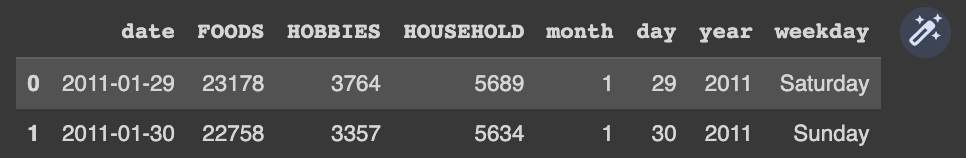

In [ ]:
df_food = train_sales_cal_df.groupby(['weekday', 'day'])['FOODS'].sum().reset_index(name='sales')
df_house = train_sales_cal_df.groupby(['weekday', 'day'])['HOUSEHOLD'].sum().reset_index(name='sales')
df_hob = train_sales_cal_df.groupby(['weekday', 'day'])['HOBBIES'].sum().reset_index(name='sales')

In [ ]:
def heatmap_plot_dates(df, title_text):

    fig = make_subplots(rows=1, cols=1, vertical_spacing = 0.15, 
                    subplot_titles=title_text,
                    shared_yaxes = True
                   )
    fig.add_trace( go.Heatmap(
                   z=[[df.loc[(df['day'] == day) & (df['weekday'] == weekday)]['sales'].sum()
                     for day in range(1, 31+1)] for weekday in df.weekday.unique()],
                   x=list(df.day.unique()),
                   y=list(df.weekday.unique()),
                   hoverongaps = False, 
                   colorbar = dict(title= title_text + '_Sales', 
                                   thickness=15)), row=1, col=1)
    fig.update_layout(title = title_text + '_Sale Distribution', height=2 * 20 + 300, width=1 * 700, showlegend=False)
    fig.show()

In [ ]:
heatmap_plot_dates(df_food, 'FOODS')
heatmap_plot_dates(df_hob, 'HOBBIES')
heatmap_plot_dates(df_house, 'HOUSEHOLD')

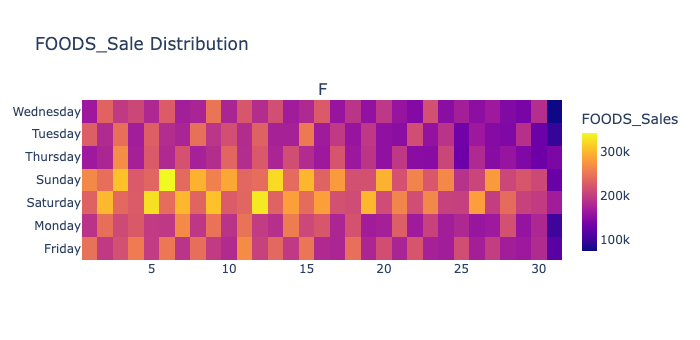

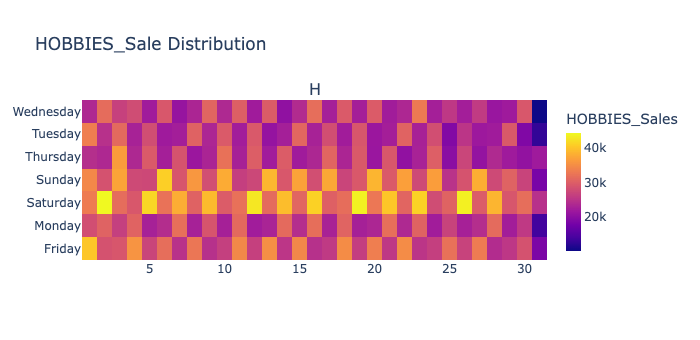

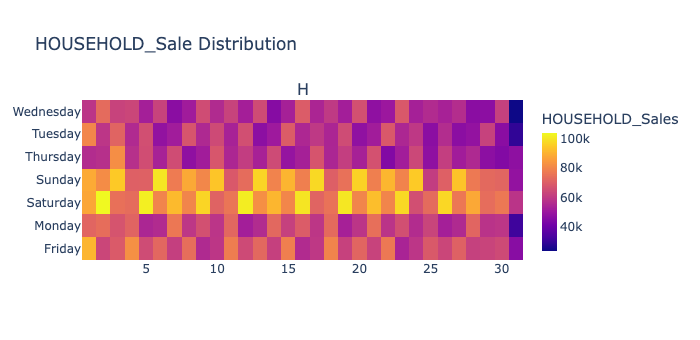